# Índice
- Câncer
    - Média
        - [Treinamento - RNA]
        - Treinamento - K-Means supervisionado: o Nearest Centroid Classifier
        - Treinamento - kNN
        - ~~Classificação - k-FOLD~~
    - Moda
        - Treinamento - RNA
        - Treinamento - K-Means supervisionado: o Nearest Centroid Classifier
        - Treinamento - kNN
        - ~~Classificação - k-FOLD~~
    - Random
        - Treinamento - RNA
        - Treinamento - K-Means supervisionado: o Nearest Centroid Classifier
        - Treinamento - kNN
        - ~~Classificação - k-FOLD~~
    - Not Empty
        - Treinamento - RNA
        - Treinamento - K-Means supervisionado: o Nearest Centroid Classifier
        - Treinamento - kNN
        - ~~Classificação - k-FOLD~~

    
- Iris
    - Média
        - Treinamento - RNA
        - Treinamento - K-Means supervisionado: o Nearest Centroid Classifier
        - Treinamento - kNN
        - ~~Classificação - k-FOLD~~
    - Moda
        - Treinamento - RNA
        - Treinamento - K-Means supervisionado: o Nearest Centroid Classifier
        - Treinamento - kNN
        - ~~Classificação - k-FOLD~~
    - Random
        - Treinamento - RNA
        - Treinamento - K-Means supervisionado: o Nearest Centroid Classifier
        - Treinamento - kNN
        - ~~Classificação - k-FOLD~~
    - Not Empty
        - Treinamento - RNA
        - Treinamento - K-Means supervisionado: o Nearest Centroid Classifier
        - Treinamento - kNN
        - ~~Classificação - k-FOLD~~


- Resultado Câncer
- Resultado Iris

# Câncer

## Média
- Em **dfCancer**, os '**-**' e '**?**' são substituídos pela média de cada coluna.

In [1039]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

kf_Split = 4 # K-fold

In [1040]:
dfCancer = pd.read_csv("breast-cancer-problemas.data", names = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11'])

for i in range (2,12):
    coluna = 'col' + str(i)
    colMedia = dfCancer[coluna][dfCancer[coluna].astype(str) != '-'][dfCancer[coluna].astype(str) != '?'].astype(str).astype(int).values.mean()
    dfCancer[coluna] = dfCancer[coluna].apply(lambda x: colMedia.astype(int) if ((x == '-') or (x == '?')) else x)

dfCancer.columns = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

dfCancerMedia = dfCancer



### Treinamento - RNA
- backpropagation
- 20 neurônios na camada escondida
- 70% para treinamento e 30% para teste 



In [1041]:
from sklearn.neural_network import MLPClassifier

dfCancerMedia.Class = dfCancerMedia.Class.apply(lambda x: 0 if x == 2 else 1) #Trocando atributo numérico por binário 2 => 0 e 4 => 1      
dfCancerMedia = dfCancerMedia.drop('id', axis=1) # Eliminando atributo id

X = dfCancerMedia.drop('Class', axis=1)
y = dfCancerMedia.Class

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20), random_state=1)

### TreiNAMENTO => a funcao fit treina a rede neural com o conjunto de entrada X e a saida esperada y
clf.fit(X_train, y_train)

# TESTE => prediz qual a classe que pertence a entrada (2,2)
# clf.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])

# [[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]] => array([1, 0])

Test = clf.predict(X_test.values)
Real = y_test.values

CancerMediaRNA_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
CancerMediaRNA_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (CancerMediaRNA_Falhas, CancerMediaRNA_Acertos))



489 foram treinados e  210 testes foram feitos. Desses, 198 tiveram resultado correto e 12 falharam
Resultado: 5.71 falharam e 94.29 acertaram


### Treinamento - K-Means supervisionado: o Nearest Centroid Classifier



In [1042]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

X = np.array(dfCancerMedia.drop('Class', axis=1).values)
y = np.array(dfCancerMedia.Class.values)

clf = NearestCentroid()
#TREINAMENTO

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf.fit(X_train, y_train)

#TESTE

# clf.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])

Test = clf.predict(X_test)
Real = y_test

CancerMediaKMeans_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
CancerMediaKMeans_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (CancerMediaKMeans_Falhas, CancerMediaKMeans_Acertos))




489 foram treinados e  210 testes foram feitos. Desses, 205 tiveram resultado correto e 5 falharam
Resultado: 2.38 falharam e 97.62 acertaram


### Treinamento - kNN

- A taxa de erro de médio de classificação para diferentes valores de k


In [1043]:
from sklearn.neighbors import KNeighborsClassifier

X = dfCancerMedia.drop('Class', axis=1).values
y = dfCancerMedia.Class.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)
#TREINAMENTO
neigh.fit(X_train, y_train) 

#TESTE

# neigh.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])

Test = neigh.predict(X_test)
Real = y_test

CancerMediaKNN_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
CancerMediaKNN_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (CancerMediaKNN_Falhas, CancerMediaKNN_Acertos))

489 foram treinados e  210 testes foram feitos. Desses, 201 tiveram resultado correto e 9 falharam
Resultado: 4.29 falharam e 95.71 acertaram


## Moda
- Em **dfCancer**, os '**-**' e '**?**' são substituídos pela moda de cada coluna.

In [1044]:
dfCancer = pd.read_csv("breast-cancer-problemas.data", names = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11'])
from statistics import mode
from statistics import mean

for i in range (2,12):
    coluna = 'col' + str(i)
    dfCancer[coluna].fillna(0, inplace=True)
    colMode = mode(dfCancer[coluna][dfCancer[coluna].astype(str) != '-'][dfCancer[coluna].astype(str) != '?'].astype(str).astype(int).values)
    dfCancer[coluna] = dfCancer[coluna].apply(lambda x: colMode if ((x == '-') or (x == '?')) else x)

dfCancer.columns = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

dfCancerModa = dfCancer




### Treinamento - RNA
- backpropagation
- 20 neurônios na camada escondida
- 70% para treinamento e 30% para teste



In [1045]:
from sklearn.neural_network import MLPClassifier

X = np.array(dfCancerModa.drop('Class', axis=1).values)
y = np.array(dfCancerModa.Class.values)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20), random_state=1)

### TreiNAMENTO => a funcao fit treina a rede neural com o conjunto de entrada X e a saida esperada y
clf.fit(X_train, y_train)

Test = clf.predict(X_test)
Real = y_test

CancerModaRNA_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
CancerModaRNA_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s%% falharam e %s%% acertaram" % (CancerModaRNA_Falhas, CancerModaRNA_Acertos))





489 foram treinados e  210 testes foram feitos. Desses, 131 tiveram resultado correto e 79 falharam
Resultado: 37.62% falharam e 62.38% acertaram


### K-FOLD (RNA)

- k variando entre k=2 até o tamanho máximo possível de folders

In [1046]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import KFold

# X = dfCancerModa.drop('Class', axis=1)
# y = dfCancerModa.Class

# ## K-FOLD START
# kf = KFold(n_splits = kf_Split)

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
# ## K-FOLD END

# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20), random_state=1)
    
# clf.fit(X_train, y_train)

# Test = clf.predict(X_test.values)
# Real = y_test.values

# CancerModaRNAKFold_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
# CancerModaRNAKFold_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

# print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
# print("Resultado: %s falharam e %s acertaram" % (CancerModaRNAKFold_Falhas, CancerModaRNAKFold_Acertos))




### Treinamento - K-Means supervisionado: o Nearest Centroid Classifier



In [1047]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

X = np.array(dfCancerModa.drop('Class', axis=1).values)
y = np.array(dfCancerModa.Class.values)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = NearestCentroid()
#TREINAMENTO
clf.fit(X_train, y_train) 
#TESTE

# clf.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])

Test = clf.predict(X_test)
Real = y_test

CancerModaKMeans_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
CancerModaKMeans_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (CancerModaKMeans_Falhas, CancerModaKMeans_Acertos))


489 foram treinados e  210 testes foram feitos. Desses, 120 tiveram resultado correto e 90 falharam
Resultado: 42.86 falharam e 57.14 acertaram


### Treinamento - kNN

- ~~A taxa de erro de médio de classificação para diferentes valores de k~~


In [1048]:
from sklearn.neighbors import KNeighborsClassifier

X = dfCancerModa.drop('Class', axis=1).values
y = dfCancerModa.Class.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)
#TREINAMENTO
neigh.fit(X_train, y_train) 

#TESTE

# neigh.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])

Test = neigh.predict(X_test)
Real = y_test

CancerModaKNN_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
CancerModaKNN_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (CancerModaKNN_Falhas, CancerModaKNN_Acertos))

489 foram treinados e  210 testes foram feitos. Desses, 124 tiveram resultado correto e 86 falharam
Resultado: 40.95 falharam e 59.05 acertaram


## Random
- Em **dfCancer**, os '**-**' e '**?**' são substituídos por um valor randômico específico de cada coluna.


In [1049]:
dfCancer = pd.read_csv("breast-cancer-problemas.data", names = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11'])

for i in range (2,12):
    coluna = 'col' + str(i)
    colCleaned = dfCancer[coluna][dfCancer[coluna].astype(str) != '-'][dfCancer[coluna].astype(str) != '?'].astype(str).astype(int)
    nu = np.random.randint(colCleaned.min(),colCleaned.max(),1) # Preenche os ruidos de uma coluna inteira com o mesmo random
    elem = nu[0]
    dfCancer[coluna] = dfCancer[coluna].apply(lambda x: elem if ((x == '-') or (x == '?')) else x)
    
dfCancer.columns = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']

dfCancerRandom = dfCancer



### Treinamento - RNA
- backpropagation
- 20 neurônios na camada escondida
- 70% para treinamento e 30% para teste



In [1050]:
dfCancerRandom.Class = dfCancerRandom.Class.apply(lambda x: 0 if x == 2 else 1) #Trocando atributo numérico por binário 2 => 0 e 4 => 1      
dfCancerRandom = dfCancerRandom.drop('id', axis=1) # Eliminando atributo id

X = dfCancerRandom.drop('Class', axis=1)
y = dfCancerRandom.Class

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20), random_state=1)

### TreiNAMENTO => a funcao fit treina a rede neural com o conjunto de entrada X e a saida esperada y
clf.fit(X_train, y_train)

# TESTE => prediz qual a classe que pertence a entrada (2,2)
# clf.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])

# [[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]] => array([1, 0])

Test = clf.predict(X_test.values)
Real = y_test.values

CancerRandomRNA_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
CancerRandomRNA_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (CancerRandomRNA_Falhas, CancerRandomRNA_Acertos))





489 foram treinados e  210 testes foram feitos. Desses, 195 tiveram resultado correto e 15 falharam
Resultado: 7.14 falharam e 92.86 acertaram


### Treinamento - K-Means supervisionado: o Nearest Centroid Classifier


In [1051]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

X = np.array(dfCancerRandom.drop('Class', axis=1).values)
y = np.array(dfCancerRandom.Class.values)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = NearestCentroid()
#TREINAMENTO
clf.fit(X_train, y_train) 
#TESTE

# clf.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])

Test = clf.predict(X_test)
Real = y_test

CancerRandomKMeans_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
CancerRandomKMeans_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (CancerRandomKMeans_Falhas, CancerRandomKMeans_Acertos))



489 foram treinados e  210 testes foram feitos. Desses, 199 tiveram resultado correto e 11 falharam
Resultado: 5.24 falharam e 94.76 acertaram


### Treinamento - kNN

- ~~A taxa de erro de médio de classificação para diferentes valores de k~~


In [1052]:
from sklearn.neighbors import KNeighborsClassifier

X = dfCancerRandom.drop('Class', axis=1).values
y = dfCancerRandom.Class.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)
#TREINAMENTO
neigh.fit(X_train, y_train) 

#TESTE

neigh.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])

Test = neigh.predict(X_test)
Real = y_test

CancerRandomKNN_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
CancerRandomKNN_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 
print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (CancerRandomKNN_Falhas, CancerRandomKNN_Acertos))

489 foram treinados e  210 testes foram feitos. Desses, 201 tiveram resultado correto e 9 falharam
Resultado: 4.29 falharam e 95.71 acertaram


## Not empty
- Em **dfCancer**, as linhas com '**-**' e '**?**' são removidas.

In [1053]:
dfCancer = pd.read_csv("breast-cancer-problemas.data", names = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class'])
dfCancer = dfCancer.replace('?', np.nan)
dfCancer = dfCancer.replace('-', np.nan)
dfCancer = dfCancer.dropna()

dfCancerNotEmpty = dfCancer



### Treinamento - RNA
- backpropagation
- 20 neurônios na camada escondida
- 70% para treinamento e 30% para teste



In [1054]:
dfCancerNotEmpty.Class = dfCancerNotEmpty.Class.apply(lambda x: 0 if x == 2 else 1) #Trocando atributo numérico por binário 2 => 0 e 4 => 1      
dfCancerNotEmpty = dfCancerNotEmpty.drop('id', axis=1) # Eliminando atributo id

X = dfCancerNotEmpty.drop('Class', axis=1)
y = dfCancerNotEmpty.Class

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20), random_state=1)

### TreiNAMENTO => a funcao fit treina a rede neural com o conjunto de entrada X e a saida esperada y
clf.fit(X_train, y_train)

# TESTE => prediz qual a classe que pertence a entrada (2,2)
clf.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])

# [[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]] => array([1, 0])

Test = clf.predict(X_test.values)
Real = y_test.values

CancerNotEmptyRNA_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
CancerNotEmptyRNA_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (CancerNotEmptyRNA_Falhas, CancerNotEmptyRNA_Acertos))




450 foram treinados e  194 testes foram feitos. Desses, 186 tiveram resultado correto e 8 falharam
Resultado: 4.12 falharam e 95.88 acertaram


### Treinamento - K-Means supervisionado: o Nearest Centroid Classifier



In [1055]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

X = np.array(dfCancerNotEmpty.drop('Class', axis=1).values)
y = np.array(dfCancerNotEmpty.Class.values)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf.fit(X_train, y_train)


clf = NearestCentroid()
#TREINAMENTO
clf.fit(X_train, y_train) 
#TESTE

# clf.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])

Test = clf.predict(X_test)
Real = y_test

CancerNotEmptyKMeans_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
CancerNotEmptyKMeans_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (CancerNotEmptyKMeans_Falhas, CancerNotEmptyKMeans_Acertos))





450 foram treinados e  194 testes foram feitos. Desses, 189 tiveram resultado correto e 5 falharam
Resultado: 2.58 falharam e 97.42 acertaram


### Treinamento - kNN

- ~~A taxa de erro de médio de classificação para diferentes valores de k~~


In [1056]:
from sklearn.neighbors import KNeighborsClassifier

X = dfCancerNotEmpty.drop('Class', axis=1).values
y = dfCancerNotEmpty.Class.values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)
#TREINAMENTO
neigh.fit(X, y) 

#TESTE

# neigh.predict([[10,7,7,6,4,10,4,1,2], [6,1,1,1,2,1,3,1,1]]) # Saída esperada: array([1, 0])


Test = neigh.predict(X_test)
Real = y_test

CancerNotEmptyKNN_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
CancerNotEmptyKNN_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (CancerNotEmptyKNN_Falhas, CancerNotEmptyKNN_Acertos))

450 foram treinados e  194 testes foram feitos. Desses, 192 tiveram resultado correto e 2 falharam
Resultado: 1.03 falharam e 98.97 acertaram


# Iris

## Média
- Em **dfCancer** e **dfIris**, os '**-**' e '**?**' são substituídos pela média de cada coluna.

In [1057]:
dfIris = pd.read_csv('iris-problemas.data', names = ["Slength","Swidth","Plength","Pwidth","class"])

#       0 -- Iris Setosa
#       1 -- Iris Versicolour
#       2 -- Iris Virginica

dfIris['class'] = dfIris['class'].apply(lambda x: 0 if x == "Iris-setosa"  else (1 if x == "Iris-versicolor" else 2))

for col in dfIris:
    colMedia = dfIris[col][dfIris[col].astype(str) != '-'].astype(str).astype(float).values.mean()
    dfIris[col] = dfIris[col].apply(lambda x: round(colMedia, 1) if (x == '-') else x)

dfIrisMedia = dfIris





### Treinamento - RNA
- backpropagation
- 20 neurônios na camada escondida
- 70% para treinamento e 30% para teste



In [1058]:
X = dfIrisMedia.drop('class', axis=1)

y = dfIrisMedia['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20), random_state=1)

### TreiNAMENTO => a funcao fit treina a rede neural com o conjunto de entrada X e a saida esperada y
clf.fit(X, y)

# TESTE => prediz qual a classe que pertence a entrada (2,2)
# clf.predict([[5.1,3.5,1.4,0.2], [5.8,2.7,4.1,1.0], [6.8,3.0,5.5,2.1]]) # Saída esperada: array([0, 1, 2])


Test = clf.predict(X_test)
Real = y_test

IrisMediaRNA_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
IrisMediaRNA_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)
 

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s%% falharam e %s%% acertaram" % (IrisMediaRNA_Falhas, IrisMediaRNA_Acertos))



105 foram treinados e  45 testes foram feitos. Desses, 45 tiveram resultado correto e 0 falharam
Resultado: 0.0% falharam e 100.0% acertaram


### Treinamento - K-Means supervisionado: o Nearest Centroid Classifier

- Taxa de acerto/erro para cada uma das bases de treinamento
- O impacto das decisões tomadas nas etapas de pré-processamento

In [1059]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X = np.array(dfIrisMedia.drop('class', axis=1).values)
y = np.array(dfIrisMedia['class'].values)

clf = NearestCentroid()
#TREINAMENTO
clf.fit(X, y) 
#TESTE

# clf.predict([[5.1,3.5,1.4,0.2], [5.8,2.7,4.1,1.0], [6.8,3.0,5.5,2.1]]) # Saída esperada: array([0, 1, 2])


Test = clf.predict(X_test)
Real = y_test

IrisMediaKMeans_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
IrisMediaKMeans_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (IrisMediaKMeans_Falhas, IrisMediaKMeans_Acertos))






105 foram treinados e  45 testes foram feitos. Desses, 36 tiveram resultado correto e 9 falharam
Resultado: 20.0 falharam e 80.0 acertaram


### Treinamento - kNN

- ~~A taxa de erro de médio de classificação para diferentes valores de k~~


In [1060]:
from sklearn.neighbors import KNeighborsClassifier

X = dfIrisMedia.drop('class', axis=1).values
y = dfIrisMedia['class'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


neigh = KNeighborsClassifier(n_neighbors=3)
#TREINAMENTO
neigh.fit(X, y) 

#TESTE

# neigh.predict([[5.1,3.5,1.4,0.2], [5.8,2.7,4.1,1.0], [6.8,3.0,5.5,2.1]]) # Saída esperada: array([0, 1, 2])

Test = clf.predict(X_test)
Real = y_test

IrisMediaKNN_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
IrisMediaKNN_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (IrisMediaKNN_Falhas, IrisMediaKNN_Acertos))


105 foram treinados e  45 testes foram feitos. Desses, 39 tiveram resultado correto e 6 falharam
Resultado: 13.33 falharam e 86.67 acertaram


## Moda
- Em **dfCancer** e **dfIris**, os '**-**' e '**?**' são substituídos pela moda de cada coluna.

In [1061]:
dfIris = pd.read_csv('iris-problemas.data', names = ["Slength","Swidth","Plength","Pwidth","class"])

#       0 -- Iris Setosa
#       1 -- Iris Versicolour
#       2 -- Iris Virginica

dfIris['class'] = dfIris['class'].apply(lambda x: 0 if x == "Iris-setosa"  else (1 if x == "Iris-versicolor" else 2))

for col in dfIris:
    if col != "class":
        colMode = mode(dfIris[col][dfIris[col].astype(str) != '-'].astype(str).astype(float).values)
        dfIris[col] = dfIris[col].apply(lambda x: round(colMedia, 1) if (x == '-') else x)

dfIrisModa = dfIris



### Treinamento - RNA
- backpropagation
- 20 neurônios na camada escondida
- ~~70% para treinamento e 30% para teste~~ 



In [1062]:
X = dfIrisModa.drop('class', axis=1)

y = dfIrisModa['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20), random_state=1)

### TreiNAMENTO => a funcao fit treina a rede neural com o conjunto de entrada X e a saida esperada y
clf.fit(X, y)

# TESTE => prediz qual a classe que pertence a entrada (2,2)
# clf.predict([[5.1,3.5,1.4,0.2], [5.8,2.7,4.1,1.0], [6.8,3.0,5.5,2.1]]) # Saída esperada: array([0, 1, 2])

Test = clf.predict(X_test)
Real = y_test

IrisModaRNA_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
IrisModaRNA_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (IrisModaRNA_Falhas, IrisModaRNA_Acertos))



105 foram treinados e  45 testes foram feitos. Desses, 44 tiveram resultado correto e 1 falharam
Resultado: 2.22 falharam e 97.78 acertaram


### Treinamento - K-Means supervisionado: o Nearest Centroid Classifier

- Taxa de acerto/erro para cada uma das bases de treinamento
- O impacto das decisões tomadas nas etapas de pré-processamento

In [1063]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

X = np.array(dfIrisModa.drop('class', axis=1).values)
y = np.array(dfIrisModa['class'].values)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = NearestCentroid()
#TREINAMENTO
clf.fit(X, y) 
#TESTE

# clf.predict([[5.1,3.5,1.4,0.2], [5.8,2.7,4.1,1.0], [6.8,3.0,5.5,2.1]]) # Saída esperada: array([0, 1, 2])

Test = clf.predict(X_test)
Real = y_test

IrisModaKMeans_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
IrisModaKMeans_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (IrisModaKMeans_Falhas, IrisModaKMeans_Acertos))

105 foram treinados e  45 testes foram feitos. Desses, 42 tiveram resultado correto e 3 falharam
Resultado: 6.67 falharam e 93.33 acertaram


### Treinamento - kNN

- ~~A taxa de erro de médio de classificação para diferentes valores de k~~


In [1064]:
from sklearn.neighbors import KNeighborsClassifier

X = dfIrisModa.drop('class', axis=1).values
y = dfIrisModa['class'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)
#TREINAMENTO
neigh.fit(X, y) 

#TESTE
# neigh.predict([[5.1,3.5,1.4,0.2], [5.8,2.7,4.1,1.0], [6.8,3.0,5.5,2.1]]) # Saída esperada: array([0, 1, 2])

Test = clf.predict(X_test)
Real = y_test

IrisModaKNN_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
IrisModaKNN_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (IrisModaKNN_Falhas, IrisModaKNN_Acertos))

105 foram treinados e  45 testes foram feitos. Desses, 42 tiveram resultado correto e 3 falharam
Resultado: 6.67 falharam e 93.33 acertaram


## Random
- Em **dfCancer** e **dfIris**, os '**-**' e '**?**' são substituídos por um valor randômico específico de cada coluna.


In [1065]:
dfIris = pd.read_csv('iris-problemas.data', names = ["Slength","Swidth","Plength","Pwidth","class"])

#       0 -- Iris Setosa
#       1 -- Iris Versicolour
#       2 -- Iris Virginica

dfIris['class'] = dfIris['class'].apply(lambda x: 0 if x == "Iris-setosa"  else (1 if x == "Iris-versicolor" else 2))

for col in dfIris:
    if col != "class":
        colRandom = dfIris[col][dfIris[col].astype(str) != '-'].astype(str).astype(float).values
        nu = np.random.randint(colCleaned.min(),colCleaned.max(),1) # Preenche os ruidos de uma coluna inteira com o mesmo random
        elem = nu[0]
        dfIris[col] = dfIris[col].apply(lambda x: elem if (x == '-') else x)

dfIrisRandom = dfIris




### Treinamento - RNA
- backpropagation
- 20 neurônios na camada escondida
- ~~70% para treinamento e 30% para teste~~ 



In [1066]:
X = dfIrisRandom.drop('class', axis=1)
y = dfIrisRandom['class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20), random_state=1)

### TreiNAMENTO => a funcao fit treina a rede neural com o conjunto de entrada X e a saida esperada y
clf.fit(X, y)

# TESTE => prediz qual a classe que pertence a entrada (2,2)
# clf.predict([[5.1,3.5,1.4,0.2], [5.8,2.7,4.1,1.0], [6.8,3.0,5.5,2.1]]) # Saída esperada: array([0, 1, 2])

Test = clf.predict(X_test)
Real = y_test

IrisRandomRNA_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
IrisRandomRNA_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (IrisRandomRNA_Falhas, IrisRandomRNA_Acertos))

105 foram treinados e  45 testes foram feitos. Desses, 42 tiveram resultado correto e 3 falharam
Resultado: 6.67 falharam e 93.33 acertaram


### Treinamento - K-Means supervisionado: o Nearest Centroid Classifier

- Taxa de acerto/erro para cada uma das bases de treinamento
- O impacto das decisões tomadas nas etapas de pré-processamento

In [1067]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

X = np.array(dfIrisRandom.drop('class', axis=1).values)
y = np.array(dfIrisRandom['class'].values)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = NearestCentroid()
#TREINAMENTO
clf.fit(X, y) 
#TESTE

# clf.predict([[5.1,3.5,1.4,0.2], [5.8,2.7,4.1,1.0], [6.8,3.0,5.5,2.1]]) # Saída esperada: array([0, 1, 2])

Test = clf.predict(X_test)
Real = y_test

IrisRandomKMeans_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
IrisRandomKMeans_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (IrisRandomKMeans_Falhas, IrisRandomKMeans_Acertos))

105 foram treinados e  45 testes foram feitos. Desses, 39 tiveram resultado correto e 6 falharam
Resultado: 13.33 falharam e 86.67 acertaram


### Treinamento - kNN

- ~~A taxa de erro de médio de classificação para diferentes valores de k~~


In [1068]:
from sklearn.neighbors import KNeighborsClassifier

X = dfIrisRandom.drop('class', axis=1).values
y = dfIrisRandom['class'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)
#TREINAMENTO
neigh.fit(X, y) 

#TESTE

# neigh.predict([[5.1,3.5,1.4,0.2], [5.8,2.7,4.1,1.0], [6.8,3.0,5.5,2.1]]) # Saída esperada: array([0, 1, 2])

Test = clf.predict(X_test)
Real = y_test

IrisRandomKNN_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
IrisRandomKNN_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (IrisRandomKNN_Falhas, IrisRandomKNN_Acertos))

105 foram treinados e  45 testes foram feitos. Desses, 41 tiveram resultado correto e 4 falharam
Resultado: 8.89 falharam e 91.11 acertaram


## Not empty
- Em **dfCancer** e **dfIris**, as linhas com '**-**' e '**?**' são removidas.

In [1069]:
dfIris = pd.read_csv('iris-problemas.data', names = ["Slength","Swidth","Plength","Pwidth","class"])
dfIris = dfIris.replace('?', np.nan)
dfIris = dfIris.replace('-', np.nan)
dfIris = dfIris.dropna()

dfIris['class'] = dfIris['class'].apply(lambda x: 0 if x == "Iris-setosa"  else (1 if x == "Iris-versicolor" else 2))

dfIrisNotEmpty = dfIris



### Treinamento - RNA
- backpropagation
- 20 neurônios na camada escondida
- ~~70% para treinamento e 30% para teste~~ 



In [1070]:
X = dfIrisNotEmpty.drop('class', axis=1)

y = dfIrisNotEmpty['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20), random_state=1)

### TreiNAMENTO => a funcao fit treina a rede neural com o conjunto de entrada X e a saida esperada y
clf.fit(X, y)

# TESTE => prediz qual a classe que pertence a entrada (2,2)
# clf.predict([[5.1,3.5,1.4,0.2], [5.8,2.7,4.1,1.0], [6.8,3.0,5.5,2.1]]) # Saída esperada: array([0, 1, 2])

Test = clf.predict(X_test)
Real = y_test

IrisNotEmptyRNA_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
IrisNotEmptyRNA_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (IrisNotEmptyRNA_Falhas, IrisNotEmptyRNA_Acertos))

82 foram treinados e  36 testes foram feitos. Desses, 35 tiveram resultado correto e 1 falharam
Resultado: 2.78 falharam e 97.22 acertaram


### Treinamento - K-Means supervisionado: o Nearest Centroid Classifier

- Taxa de acerto/erro para cada uma das bases de treinamento
- O impacto das decisões tomadas nas etapas de pré-processamento

In [1071]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

X = np.array(dfIrisNotEmpty.drop('class', axis=1).values)
y = np.array(dfIrisNotEmpty['class'].values)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = NearestCentroid()
#TREINAMENTO
clf.fit(X, y) 
#TESTE

# clf.predict([[5.1,3.5,1.4,0.2], [5.8,2.7,4.1,1.0], [6.8,3.0,5.5,2.1]]) # Saída esperada: array([0, 1, 2])

Test = clf.predict(X_test)
Real = y_test

IrisNotEmptyKMeans_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
IrisNotEmptyKMeans_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (IrisNotEmptyKMeans_Falhas, IrisNotEmptyKMeans_Acertos))

82 foram treinados e  36 testes foram feitos. Desses, 32 tiveram resultado correto e 4 falharam
Resultado: 11.11 falharam e 88.89 acertaram


### Treinamento - kNN

- ~~A taxa de erro de médio de classificação para diferentes valores de k~~


In [1072]:
from sklearn.neighbors import KNeighborsClassifier

X = dfIrisNotEmpty.drop('class', axis=1).values
y = dfIrisNotEmpty['class'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

neigh = KNeighborsClassifier(n_neighbors=3)
#TREINAMENTO
neigh.fit(X, y) 

#TESTE

# neigh.predict([[5.1,3.5,1.4,0.2], [5.8,2.7,4.1,1.0], [6.8,3.0,5.5,2.1]]) # Saída esperada: array([0, 1, 2])

Test = clf.predict(X_test)
Real = y_test

IrisNotEmptyKNN_Falhas = round((np.sum(Test != Real)*100)/(Test.size), 2)
IrisNotEmptyKNN_Acertos = round((np.sum(Test == Real)*100)/(Test.size), 2)

print("%s foram treinados e  %s testes foram feitos. Desses, %s tiveram resultado correto e %s falharam" % (y_train.size, Real.size, np.sum(Test == Real), np.sum(Test != Real)))
print("Resultado: %s falharam e %s acertaram" % (IrisNotEmptyKNN_Falhas, IrisNotEmptyKNN_Acertos))

82 foram treinados e  36 testes foram feitos. Desses, 33 tiveram resultado correto e 3 falharam
Resultado: 8.33 falharam e 91.67 acertaram


# Resultado - Câncer

In [1073]:
# initialise data of lists. 
data = {'Media':[CancerMediaRNA_Acertos, CancerMediaKMeans_Acertos, CancerMediaKNN_Acertos], 'Moda':[CancerModaRNA_Acertos, CancerModaKMeans_Acertos, CancerModaKNN_Acertos], 'Random':[CancerRandomRNA_Acertos, CancerRandomKMeans_Acertos, CancerRandomKNN_Acertos], 'Not Empty':[CancerNotEmptyRNA_Acertos, CancerNotEmptyKMeans_Acertos, CancerNotEmptyKNN_Acertos]} #Pre
 
    
# Creates pandas DataFrame. 
dfCancerResultAcertos = pd.DataFrame(data, index =['RNA', 'K-Means', 'kNN']) 


In [1074]:
# initialise data of lists. 
data = {'Media':[CancerMediaRNA_Falhas, CancerMediaKMeans_Falhas, CancerMediaKNN_Falhas], 'Moda':[CancerModaRNA_Falhas, CancerModaKMeans_Falhas, CancerModaKNN_Falhas], 'Random':[CancerRandomRNA_Falhas, CancerRandomKMeans_Falhas, CancerRandomKNN_Falhas], 'Not Empty':[CancerNotEmptyRNA_Falhas, CancerNotEmptyKMeans_Falhas, CancerNotEmptyKNN_Falhas]} #Pre
 
    
# Creates pandas DataFrame. 
dfCancerResultFalhas = pd.DataFrame(data, index =['RNA', 'K-Means', 'kNN']) 


# Resultado - Iris

In [1075]:
# initialise data of lists. 
data = {'Media':[IrisMediaRNA_Acertos, IrisMediaKMeans_Acertos, IrisMediaKNN_Acertos], 'Moda':[IrisModaRNA_Acertos, IrisModaKMeans_Acertos, IrisModaKNN_Acertos], 'Random':[IrisRandomRNA_Acertos, IrisRandomKMeans_Acertos, IrisRandomKNN_Acertos], 'Not Empty':[IrisNotEmptyRNA_Acertos, IrisNotEmptyKMeans_Acertos, IrisNotEmptyKNN_Acertos]} #Pre
 
    
# Creates pandas DataFrame. 
dfIrisResultAcertos = pd.DataFrame(data, index =['RNA', 'K-Means', 'kNN']) 


In [1076]:
# initialise data of lists. 
data = {'Media':[IrisMediaRNA_Falhas, IrisMediaKMeans_Falhas, IrisMediaKNN_Falhas], 'Moda':[IrisModaRNA_Falhas, IrisModaKMeans_Falhas, IrisModaKNN_Falhas], 'Random':[IrisRandomRNA_Falhas, IrisRandomKMeans_Falhas, IrisRandomKNN_Falhas], 'Not Empty':[IrisNotEmptyRNA_Falhas, IrisNotEmptyKMeans_Falhas, IrisNotEmptyKNN_Falhas]} #Pre
 
    
# Creates pandas DataFrame. 
dfIrisResultFalhas = pd.DataFrame(data, index =['RNA', 'K-Means', 'kNN']) 


## Acertos - Câncer (%)

In [1077]:
dfCancerResultAcertos


,Media,Moda,Not Empty,Random
RNA,94.29,62.38,95.88,92.86
K-Means,97.62,57.14,97.42,94.76
kNN,95.71,59.05,98.97,95.71


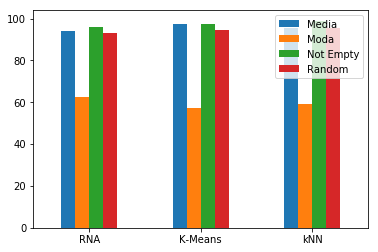

In [1078]:
ax = dfCancerResultAcertos.plot.bar(rot=0)

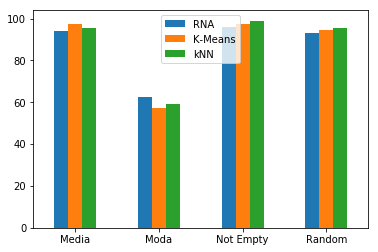

In [1079]:
ax = dfCancerResultAcertos.T.plot.bar(rot=0)

## Falhas - Câncer (%)

In [1080]:
dfCancerResultFalhas

,Media,Moda,Not Empty,Random
RNA,5.71,37.62,4.12,7.14
K-Means,2.38,42.86,2.58,5.24
kNN,4.29,40.95,1.03,4.29


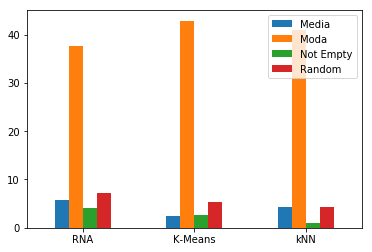

In [1081]:
ax = dfCancerResultFalhas.plot.bar(rot=0)

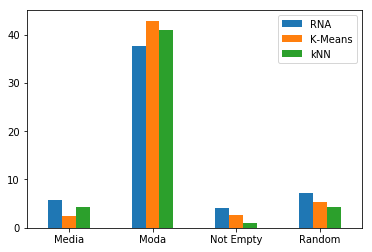

In [1082]:
ax = dfCancerResultFalhas.T.plot.bar(rot=0)

## Acertos - Iris (%)

In [1083]:
dfIrisResultAcertos

,Media,Moda,Not Empty,Random
RNA,100.00,97.78,97.22,93.33
K-Means,80.00,93.33,88.89,86.67
kNN,86.67,93.33,91.67,91.11


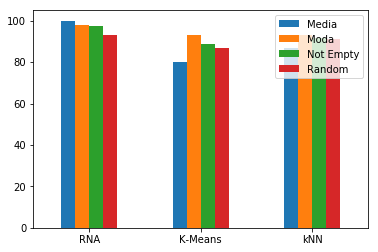

In [1084]:
ax = dfIrisResultAcertos.plot.bar(rot=0)


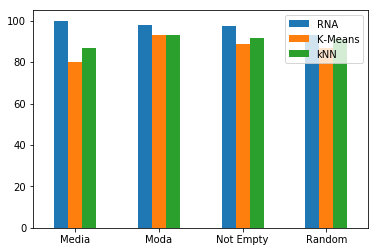

In [1085]:
ax = dfIrisResultAcertos.T.plot.bar(rot=0)

## Falhas - Iris (%)

In [1086]:
dfIrisResultFalhas

,Media,Moda,Not Empty,Random
RNA,0.00,2.22,2.78,6.67
K-Means,20.00,6.67,11.11,13.33
kNN,13.33,6.67,8.33,8.89


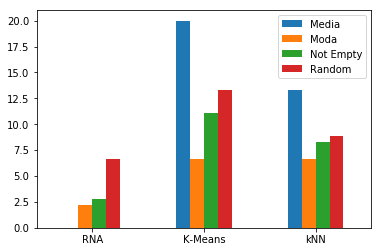

In [1092]:
ax = dfIrisResultFalhas.plot.bar(rot=0)

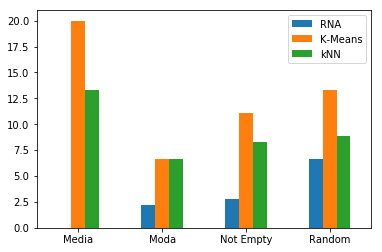

In [1088]:
ax = dfIrisResultFalhas.T.plot.bar(rot=0)